In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
from colour import wavelength_to_XYZ

In [2]:
from chromalab.observer import Observer, Cone, getsRGBfromWavelength, transformToDisplayChromaticity, getHeringMatrix
from chromalab.spectra import Spectra, Illuminant
from chromalab.maxbasis import MaxBasis
from chromalab.maxdisplaybasis import *
from chromalab.visualizer import PSWrapper, DisplayBasisType, exportAndPlay, easeFunction
from chromalab.animation import Animation

objc[26760]: Class GLFWApplicationDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2b1152e28) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2cec3e6f0). One of the two will be used. Which one is undefined.
objc[26760]: Class GLFWWindowDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2b1152db0) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2cec3e718). One of the two will be used. Which one is undefined.
objc[26760]: Class GLFWContentView is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x2b1152e50) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

## Create the Cone Fundamentals in 4D

In [4]:
wavelengths = np.arange(400, 700, 1)
d65 = Illuminant.get("D65")

In [5]:
trichromat = Observer.trichromat(wavelengths=wavelengths, illuminant=d65) 
maxbasis_tri = MaxBasis(trichromat, verbose=True)
# # viz_tri = PSWrapper(trichromat, maxbasis_tri, itemsToDisplay=PSWrapper.ItemsToDisplay.MESH, displayBasis=DisplayBasisType.MAXBASIS, verbose=True)

100%|██████████| 8/8 [00:00<00:00, 999.74it/s]


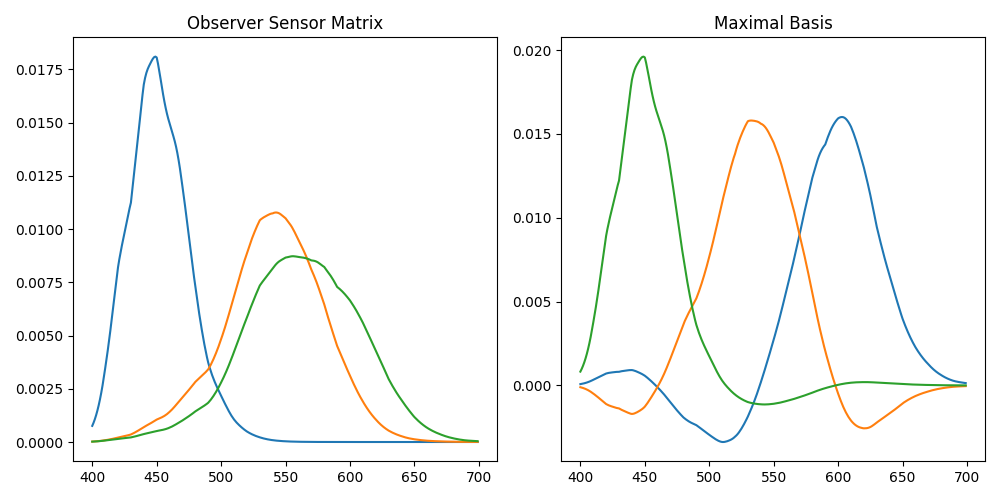

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot observer.sensor_matrix on the left subplot
axs[0].plot(trichromat.wavelengths, trichromat.normalized_sensor_matrix.T)
axs[0].set_title('Observer Sensor Matrix')

# Plot the existing plot on the right subplot
[axs[1].plot(maxbasis_tri.wavelengths, x.data )for x in maxbasis_tri.get_cmf()]
axs[1].set_title('Maximal Basis')

plt.tight_layout()
plt.show()

In [7]:
mdb = TriDisplayGamut(trichromat, chromaticity_diagram_type=ChromaticityDiagramType.LaserPoint, transformMatrix=maxbasis_tri.get_cone_to_maxbasis_transform())

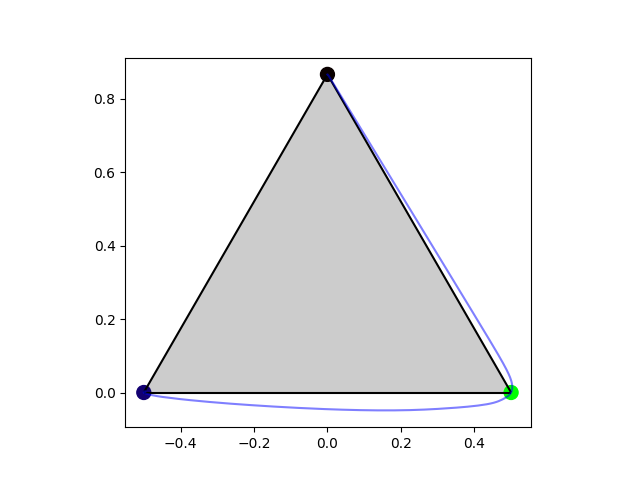

In [10]:
mdb.displayPrimariesInMaxSimplex()

In [ ]:
points_3d = mdb.matrix
chrom_points = (points_3d / np.sum(points_3d, axis = 0)).T

In [ ]:
plotAxisAlignedProjections(points_3d.T, axis_labels=["S", "M", "L"])

In [ ]:
plotAxisAlignedProjections(chrom_points, axis_labels=["S/A", "M/A", "L/A"])

In [ ]:
points_3d = maxbasis_tri.get_cone_to_maxbasis_transform()@mdb.matrix
rgb_points = (points_3d / np.sum(points_3d, axis = 0)).T
plotAxisAlignedProjections(rgb_points)

In [ ]:
mat = np.array([[1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)], [np.sqrt(2/3), -(1/np.sqrt(6)), -(1/np.sqrt(6))], [0, 1/np.sqrt(2), -(1/np.sqrt(2))]])
points = (mat@rgb_points.T).T

theta = -np.pi/6
new_points = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])@points[:, 1:].T

fig = plt.figure()
plt.plot(new_points[0], new_points[1], '-o')
plt.axis('equal')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(rgb_points[:, 0], rgb_points[:, 1], rgb_points[:, 2], '-o', markersize=5, alpha=0.6)

# Plot the vectors in mat
ax.quiver(0, 0, 0, mat[0, 0], mat[0, 1], mat[0, 2], color='r')
ax.quiver(0, 0, 0, mat[1, 0], mat[1, 1], mat[1, 2], color='g')
ax.quiver(0, 0, 0, mat[2, 0], mat[2, 1], mat[2, 2], color='b')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Vectors in 3D Space')

# Set limits for the axes
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Show the plot
plt.show()